In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mbl
from scipy import stats
%matplotlib inline

from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
statcast_2019 = pd.read_csv("/Users/orah82/baseball_cap/data_2019.csv")

In [3]:
statcast_2018 = pd.read_csv("/Users/orah82/baseball_cap/data_2018.csv")

In [4]:
statcast_2017 = pd.read_csv("/Users/orah82/baseball_cap/data_2017.csv")

In [2]:
statcast_2016 = pd.read_csv("/Users/orah82/baseball_cap/data_2016.csv")

In [8]:
pitching= pd.read_csv("/Users/orah82/baseball_cap/pitching_2016-18.csv")

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 101)

In [4]:
statcast_2016.drop(columns="Unnamed: 0", inplace=True)
statcast_2016.set_index("index", inplace=True)

In [8]:
['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin', 'pfx_x', 'pfx_z',]

['release_speed',
 'release_pos_x',
 'release_pos_z',
 'release_spin',
 'pfx_x',
 'pfx_z']

In [9]:
pitching['Pitches'] = pitching['Pitches'].mask(pitching['Pitches'] < 200)

In [28]:
pitching.head()

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,118,2018.0,Jacob deGrom,Mets,30.0,10.0,9.0,1.70,9.0,32.0,32.0,1.0,0.0,0.0,0.0,217.0,835.0,152.0,48.0,41.0,10.0,46.0,3.0,5.0,2.0,0.0,269.0,235.0,160.0,111.0,26.0,999.0,2213.0,3212.0,86.0,16.0,9.0,2.0,11.16,1.91,5.85,6.30,0.41,0.194,0.91,0.281,0.820,1.99,1.47,0.219,0.464,0.163,0.063,0.068,0.222,75.8,217.0,NaN,NaN,75.8,$72.3,2.15,2.60,5.85,-12.63,18.48,52.57,5.70,1.14,1.06,0.88,1.01,31.0,4.62,0.52,0.521,96.0,0.239,91.1,NaN,NaN,0.079,82.7,0.161,89.0,NaN,NaN,NaN,NaN,0.003,NaN,23.9,15.9,NaN,4.6,12.8,NaN,NaN,1.43,2.08,NaN,1.81,2.48,NaN,NaN,0.379,0.688,0.517,0.577,0.797,0.708,0.446,0.665,0.151,0.0,0.0,0.0,45.0,49.0,64.0,0.322,0.055,2.78,3.57,-0.29,0.435,0.089,NaN,NaN,NaN,NaN,0.240,0.079,NaN,NaN,0.157,NaN,NaN,NaN,96.0,95.3,NaN,NaN,NaN,NaN,91.1,82.7,NaN,NaN,88.9,NaN,NaN,-3.0,-7.4,NaN,NaN,NaN,NaN,1.8,3.4,NaN,NaN,-7.7,NaN,NaN,9.2,6.9,NaN,NaN,NaN,NaN,3.3,-2.3,NaN,NaN,3.1,NaN,NaN,26.1,-1.5,NaN,NaN,NaN,NaN,16.6,4.5,NaN,NaN,13.8,NaN,NaN,1.87,-0.53,NaN,NaN,NaN,NaN,2.16,1.76,NaN,NaN,2.75,NaN,NaN,0.368,0.663,0.517,0.539,0.799,0.707,0.507,21.3,9.5,0.4,0.1,0.5,30 - 30,0.267,0.423,0.320,0.256,0.252,0.482,0.266,2.60,0.389,0.161,NaN,0.079,0.427,NaN,NaN,NaN,NaN,0.095,0.239,NaN,89.6,NaN,83.2,96.7,NaN,NaN,NaN,NaN,96.1,91.6,NaN,-7.4,NaN,3.9,-2.4,NaN,NaN,NaN,NaN,-6.9,2.4,NaN,2.9,NaN,-2.7,9.4,NaN,NaN,NaN,NaN,7.0,3.1,NaN,13.0,NaN,4.4,23.6,NaN,NaN,NaN,NaN,0.9,17.2,NaN,2.52,NaN,1.72,1.73,NaN,NaN,NaN,NaN,0.30,2.25,NaN,0.367,0.661,0.518,0.524,0.804,0.708,0.513,21.9
1,386,2017.0,Chris Sale,Red Sox,28.0,17.0,8.0,2.90,7.5,32.0,32.0,1.0,0.0,0.0,0.0,214.1,851.0,165.0,73.0,69.0,24.0,43.0,0.0,8.0,3.0,0.0,3

In [10]:
 pitching['Pitches'].dropna(how='any', inplace=True)

In [11]:
pitching.sort_values(by='FIP')

,Unnamed: 0,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (pfx),FT% (pfx),FC% (pfx),FS% (pfx),FO% (pfx),SI% (pfx),SL% (pfx),CU% (pfx),KC% (pfx),EP% (pfx),CH% (pfx),SC% (pfx),KN% (pfx),UN% (pfx),vFA (pfx),vFT (pfx),vFC (pfx),vFS (pfx),vFO (pfx),vSI (pfx),vSL (pfx),vCU (pfx),vKC (pfx),vEP (pfx),vCH (pfx),vSC (pfx),vKN (pfx),FA-X (pfx),FT-X (pfx),FC-X (pfx),FS-X (pfx),FO-X (pfx),SI-X (pfx),SL-X (pfx),CU-X (pfx),KC-X (pfx),EP-X (pfx),CH-X (pfx),SC-X (pfx),KN-X (pfx),FA-Z (pfx),FT-Z (pfx),FC-Z (pfx),FS-Z (pfx),FO-Z (pfx),SI-Z (pfx),SL-Z (pfx),CU-Z (pfx),KC-Z (pfx),EP-Z (pfx),CH-Z (pfx),SC-Z (pfx),KN-Z (pfx),wFA (pfx),wFT (pfx),wFC (pfx),wFS (pfx),wFO (pfx),wSI (pfx),wSL (pfx),wCU (pfx),wKC (pfx),wEP (pfx),wCH (pfx),wSC (pfx),wKN (pfx),wFA/C (pfx),wFT/C (pfx),wFC/C (pfx),wFS/C (pfx),wFO/C (pfx),wSI/C (pfx),wSL/C (pfx),wCU/C (pfx),wKC/C (pfx),wEP/C (pfx),wCH/C (pfx),wSC/C (pfx),wKN/C (pfx),O-Swing% (pfx),Z-Swing% (pfx),Swing% (pfx),O-Contact% (pfx),Z-Contact% (pfx),Contact% (pfx),Zone% (pfx),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
1573,2229,2018.0,Adam McCreery,Braves,25.0,0.0,0.0,18.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,0.0,11.0,19.0,NaN,1.0,0.0,0.0,0.0,18.00,0.00,2.00,36.00,0.00,0.571,4.00,0.800,0.500,-0.84,1.00,0.600,0.200,0.000,0.000,0.000,0.000,NaN,NaN,0.4,1.0,0.4,$0.3,5.70,0.81,-0.05,-0.06,0.01,-1.50,-0.15,0.22,0.23,0.23,NaN,0.0,-0.13,-0.07,NaN,NaN,NaN,NaN,0.433,92.2,0.567,80.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.1,0.1,NaN,NaN,NaN,NaN,NaN,-8.79,0.61,NaN,NaN,NaN,0.118,0.846,0.433,0.000,0.818,0.692,0.433,0.571,0.133,0.0,0.0,0.0,441.0,-22.0,19.0,0.286,0.000,2.37,9.00,18.84,0.067,NaN,0.367,NaN,NaN,NaN,NaN,0.567,NaN,NaN,NaN,NaN,NaN,NaN,92.6,NaN,91.9,NaN,NaN,NaN,NaN,80.5,NaN,NaN,NaN,NaN,NaN,0.5,NaN,-2.4,NaN,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,3.3,NaN,3.9,NaN,NaN,NaN,NaN,-6.2,NaN,NaN,NaN,NaN,NaN,-0.2,NaN,-0.9,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,-11.40,NaN,-8.54,NaN,NaN,NaN,NaN,0.59,NaN,NaN,NaN,NaN,NaN,0.154,0.647,0.433,0.000,0.818,0.692,0.567,25.7,-0.1,-0.2,0.1,-0.1,25 - 25,0.286,0.600,0.200,0.200,0.000,0.800,0.200,2.38,0.286,NaN,NaN,NaN,0.433,NaN,NaN,NaN,NaN,NaN,0.567,NaN,NaN,NaN,NaN,92.0,NaN,NaN,NaN,NaN,NaN,80.4,NaN,NaN,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,-7.1,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,-1.2,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,NaN,-8.98,NaN,NaN,NaN,NaN,NaN,0.59,NaN,0.214,0.625,0.433,0.333,0.800,0.692,0.533,25.7
1429,64,2018.0,Alex Blandino,Reds,25.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,5.0,10.0,NaN,0.0,1.0,0.0,0.0,18.00,0.00,2.00,9

In [5]:
statcast_2016.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,FC,2016-09-29,89.9,-1.3285,6.2611,Alex Colome,570560.0,517008.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Carlos Sanchez flies out to center fielder Kev...,R,L,R,CWS,TB,X,8.0,fly_ball,1.0,1.0,2016.0,-0.212108,0.581267,-0.246,1.835,NaN,605183.0,NaN,2.0,9.0,Bot,104.05,62.39,NaN,NaN,435064.0,NaN,160929_230112,3.346,-130.907,-4.982,-0.997,35.076,-27.621,3.23,1.53,381.0,106.0,17.0,88.625,2119.0,6.331,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1707,0.668,0.826,0.0,1.0,0.0,0.0,5.0,76.0,3.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
15,FC,2016-09-29,90.0,-1.0754,6.3885,Alex Colome,570560.0,517008.0,NaN,called_strike,NaN,NaN,NaN,NaN,11.0,NaN,R,L,R,CWS,TB,S,NaN,NaN,1.0,0.0,2016.0,-0.159225,0.727467,-0.907,2.735,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230048,1.020,-131.072,-3.572,-0.351,35.252,-25.880,3.19,1.53,NaN,NaN,NaN,88.776,1976.0,6.380,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,2.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
19,FC,2016-09-29,90.8,-1.1806,6.3923,Alex Colome,570560.0,517008.0,NaN,blocked_ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,0.0,0.0,2016.0,-0.021450,0.819200,-0.222,0.808,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230021,2.474,-132.019,-8.600,1.362,29.798,-24.532,3.25,1.55,NaN,NaN,NaN,90.461,2181.0,6.475,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
22,FF,2016-09-29,95.7,-1.1880,6.4365,Alex Colome,488671.0,517008.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,4.0,Alex Avila strikes out swinging.,R,L,R,CWS,TB,S,2.0,NaN,2.0,2.0,2016.0,-0.579508,1.335200,-0.569,2.265,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225941,3.020,-139.104,-7.055,-6.286,33.051,-16.685,3.40,1.60,NaN,NaN,NaN,94.905,2091.0,6.294,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.2074,NaN,NaN,0.0,1.0,0.0,0.0,NaN,75.0,5.0,4-Seam Fastball,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard
24,FC,2016-09-29,89.1,-1.2936,6.3917,Alex Colome,488671.0,517008.0,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,1.0,2.0,2016.0,0.259667,0.575533,-1.008,2.015,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225914,0.231,-129.720,-4.865,4.751,27.830,-27.650,3.25,1.60,NaN,NaN,NaN,88.492,2141.0,6.172,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard


In [10]:
name = statcast_2016.groupby(["player_name"])

In [11]:
Justin_2016 = name.get_group('Justin Verlander')

In [12]:
Justin_2016

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
9877,9877,7860,SL,2016-09-27,90.6,-2.2434,6.4808,Justin Verlander,570481.0,434378.0,single,hit_into_play_no_out,NaN,NaN,NaN,NaN,14.0,Erik Gonzalez singles on a soft ground ball to...,R,R,R,DET,CLE,X,5.0,ground_ball,0.0,2.0,2016.0,-0.582292,0.657233,1.114,2.419,NaN,NaN,NaN,2.0,8.0,Top,115.73,186.50,NaN,NaN,543510.0,NaN,160927_214929,9.125,-131.531,-5.320,-5.737,26.258,-26.468,3.60,1.62,NaN,90.3,-17.0,89.943,2613.0,6.075,449216.0,434378.0,543510.0,461865.0,435079.0,430947.0,578428.0,457708.0,457727.0,502110.0,54.4266,0.146,0.136,0.9,1.0,1.0,0.0,2.0,62.0,3.0,Slider,9.0,0.0,0.0,9.0,0.0,9.0,0.0,9.0,Standard,Standard
9878,9878,7875,SL,2016-09-27,88.8,-2.2668,6.5166,Justin Verlander,570481.0,434378.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,DET,CLE,S,NaN,NaN,0.0,1.0,2016.0,-0.427817,0.707400,0.516,2.162,NaN,NaN,NaN,2.0,8.0,Top,NaN,NaN,NaN,NaN,543510.0,NaN,160927_214907,7.194,-129.024,-5.922,-3.683,21.589,-26.001,3.67,1.62,NaN,NaN,NaN,88.874,2463.0,6.102,449216.0,434378.0,543510.0,461865.0,435079.0,430947.0,578428.0,457708.0,457727.0,502110.0,54.4001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,2.0,Slider,9.0,0.0,0.0,9.0,0.0,9.0,0.0,9.0,Standard,Standard
9879,9879,7888,SL,2016-09-27,90.1,-2.3057,6.5418,Justin Verlander,570481.0,434378.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,DET,CLE,S,NaN,NaN,0.0,0.0,2016.0,-0.334575,0.945333,0.296,1.803,NaN,NaN,NaN,2.0,8.0,Top,NaN,NaN,NaN,NaN,543510.0,NaN,160927_214848,6.736,-130.878,-7.510,-2.554,27.403,-23.065,3.67,1.62,NaN,NaN,NaN,89.372,2490.0,6.084,449216.0,434378.0,543510.0,461865.0,435079.0,430947.0,578428.0,457708.0,457727.0,502110.0,54.4178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,1.0,Slider,9.0,0.0,0.0,9.0,0.0,9.0,0.0,9.0,Strategic,Standard
9880,9880,7903,FF,2016-09-27,96.8,-2.0820,6.6180,Justin Verlander,446192.0,434378.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,11.0,Adam Moore strikes out swinging.,R,R,R,DET,CLE,S,2.0,NaN,3.0,2.0,2016.0,-1.182100,1.934333,-0.371,3.518,NaN,NaN,NaN,1.0,8.0,Top,NaN,NaN,NaN,NaN,543510.0,NaN,160927_214814,6.895,-140.627,-6.759,-15.013,34.186,-8.051,3.33,1.51,NaN,NaN,NaN,95.857,2732.0,6.141,449216.0,434378.0,543510.0,461865.0,435079.0,430947.0,578428.0,457708.0,457727.0,502110.0,54.3608,NaN,NaN,0.0,1.0,0.0,0.0,NaN,61.0,6.0,4-Seam Fastball,9.0,0.0,0.0,9.0,0.0,9.0,0.0,9.0,Standard,Standard
9881,9881,7916,FF,2016-09-27,95.0,-2.2204,6.6187,Justin Verlander,446192.0,434378.0,NaN,swinging_strike,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,DET,CLE,S,NaN,NaN,3.0,1.0,2016.0,-1.300392,1.702133,-0.509,2.457,NaN,NaN,NaN,1.0,8.0,Top,NaN,NaN,NaN,NaN,543510.0,NaN,160927_214751,6.908,-137.912,-8.615,-16.001,34.110,-12.167,3.36,1.51,NaN,NaN,NaN,94.349,2642.0,6.429,449216.0,434378.0,543510.0,461865.0,435079.0,430947.0,578428.0,457708.0,457727.0,502110.0,54.0725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,5.0,4-Seam Fastball,9.0,0.0,0.0,9.0,0.0,9.0,0.0,9.0,Standard,Standard
9882,9882,7930,FF,2016-09-27,92.7,-2.1407,6.6329,Justin Verlander,446192.0,434378.0,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,DET,CLE,S

In [5]:
statcast_2016.head(50)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,FC,2016-09-29,89.9,-1.3285,6.2611,Alex Colome,570560.0,517008.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Carlos Sanchez flies out to center fielder Kev...,R,L,R,CWS,TB,X,8.0,fly_ball,1.0,1.0,2016.0,-0.212108,0.581267,-0.246,1.835,NaN,605183.0,NaN,2.0,9.0,Bot,104.05,62.39,NaN,NaN,435064.0,NaN,160929_230112,3.346,-130.907,-4.982,-0.997,35.076,-27.621,3.23,1.53,381.0,106.0,17.0,88.625,2119.0,6.331,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1707,0.668,0.826,0.00,1.0,0.0,0.0,5.0,76.0,3.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
15,FC,2016-09-29,90.0,-1.0754,6.3885,Alex Colome,570560.0,517008.0,NaN,called_strike,NaN,NaN,NaN,NaN,11.0,NaN,R,L,R,CWS,TB,S,NaN,NaN,1.0,0.0,2016.0,-0.159225,0.727467,-0.907,2.735,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230048,1.020,-131.072,-3.572,-0.351,35.252,-25.880,3.19,1.53,NaN,NaN,NaN,88.776,1976.0,6.380,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,2.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
19,FC,2016-09-29,90.8,-1.1806,6.3923,Alex Colome,570560.0,517008.0,NaN,blocked_ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,0.0,0.0,2016.0,-0.021450,0.819200,-0.222,0.808,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230021,2.474,-132.019,-8.600,1.362,29.798,-24.532,3.25,1.55,NaN,NaN,NaN,90.461,2181.0,6.475,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
22,FF,2016-09-29,95.7,-1.1880,6.4365,Alex Colome,488671.0,517008.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,4.0,Alex Avila strikes out swinging.,R,L,R,CWS,TB,S,2.0,NaN,2.0,2.0,2016.0,-0.579508,1.335200,-0.569,2.265,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225941,3.020,-139.104,-7.055,-6.286,33.051,-16.685,3.40,1.60,NaN,NaN,NaN,94.905,2091.0,6.294,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.2074,NaN,NaN,0.00,1.0,0.0,0.0,NaN,75.0,5.0,4-Seam Fastball,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard
24,FC,2016-09-29,89.1,-1.2936,6.3917,Alex Colome,488671.0,517008.0,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,1.0,2.0,2016.0,0.259667,0.575533,-1.008,2.015,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225914,0.231,-129.720,-4.865,4.751,27.830,-27.650,3.25,1.60,NaN,NaN,NaN,88.492,2141.0,6.172,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard
28,FC,2016-09-29,89.5,-1.1740,6.4065,Alex Colome,488671.0,517008.0,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,0.0,2.0,2016.0,0.277758,

In [6]:
statcast_2016['events'].value_counts()

field_out                       72912
strikeout                       38078
single                          27059
walk                            13895
double                           8104
home_run                         5525
force_out                        3807
grounded_into_double_play        3666
hit_by_pitch                     1628
field_error                      1573
sac_fly                          1165
sac_bunt                         1009
intent_walk                       916
triple                            860
double_play                       445
fielders_choice_out               282
caught_stealing_2b                221
strikeout_double_play             139
fielders_choice                    97
pickoff_caught_stealing_2b         48
other_out                          42
catcher_interf                     37
pickoff_1b                         29
sac_fly_double_play                24
caught_stealing_3b                 18
pickoff_2b                         11
run         

In [7]:
statcast_2016.shape

(702823, 89)

In [21]:
# statcast_2016 = statcast_2016.replace(['sac_bunt_double_play','intent_walk','pickoff_1b','sac_fly_double_play','field_error','catcher_interf','pickoff_2b',
#                                      "pickoff_caught_stealing_3b","pickoff_caught_stealing_2b"], np.nan)



In [5]:
statcast_2016['events'].fillna(0, inplace=True)

In [6]:
statcast_2016['events'].value_counts()

0                               521207
field_out                        72912
strikeout                        38078
single                           27059
walk                             13895
double                            8104
home_run                          5525
force_out                         3807
grounded_into_double_play         3666
hit_by_pitch                      1628
field_error                       1573
sac_fly                           1165
sac_bunt                          1009
intent_walk                        916
triple                             860
double_play                        445
fielders_choice_out                282
caught_stealing_2b                 221
strikeout_double_play              139
fielders_choice                     97
pickoff_caught_stealing_2b          48
other_out                           42
catcher_interf                      37
pickoff_1b                          29
sac_fly_double_play                 24
caught_stealing_3b       

In [20]:
statcast_2016.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13,FC,2016-09-29,89.9,-1.3285,6.2611,Alex Colome,570560.0,517008.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,Carlos Sanchez flies out to center fielder Kev...,R,L,R,CWS,TB,X,8.0,fly_ball,1.0,1.0,2016.0,-0.212108,0.581267,-0.246,1.835,NaN,605183.0,NaN,2.0,9.0,Bot,104.05,62.39,NaN,NaN,435064.0,NaN,160929_230112,3.346,-130.907,-4.982,-0.997,35.076,-27.621,3.23,1.53,381.0,106.0,17.0,88.625,2119.0,6.331,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1707,0.668,0.826,0.0,1.0,0.0,0.0,5.0,76.0,3.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
15,FC,2016-09-29,90.0,-1.0754,6.3885,Alex Colome,570560.0,517008.0,NaN,called_strike,NaN,NaN,NaN,NaN,11.0,NaN,R,L,R,CWS,TB,S,NaN,NaN,1.0,0.0,2016.0,-0.159225,0.727467,-0.907,2.735,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230048,1.020,-131.072,-3.572,-0.351,35.252,-25.880,3.19,1.53,NaN,NaN,NaN,88.776,1976.0,6.380,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,2.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
19,FC,2016-09-29,90.8,-1.1806,6.3923,Alex Colome,570560.0,517008.0,NaN,blocked_ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,0.0,0.0,2016.0,-0.021450,0.819200,-0.222,0.808,NaN,605183.0,NaN,2.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_230021,2.474,-132.019,-8.600,1.362,29.798,-24.532,3.25,1.55,NaN,NaN,NaN,90.461,2181.0,6.475,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.0267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,1.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Standard,Standard
22,FF,2016-09-29,95.7,-1.1880,6.4365,Alex Colome,488671.0,517008.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,4.0,Alex Avila strikes out swinging.,R,L,R,CWS,TB,S,2.0,NaN,2.0,2.0,2016.0,-0.579508,1.335200,-0.569,2.265,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225941,3.020,-139.104,-7.055,-6.286,33.051,-16.685,3.40,1.60,NaN,NaN,NaN,94.905,2091.0,6.294,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.2074,NaN,NaN,0.0,1.0,0.0,0.0,NaN,75.0,5.0,4-Seam Fastball,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard
24,FC,2016-09-29,89.1,-1.2936,6.3917,Alex Colome,488671.0,517008.0,NaN,ball,NaN,NaN,NaN,NaN,13.0,NaN,R,L,R,CWS,TB,B,NaN,NaN,1.0,2.0,2016.0,0.259667,0.575533,-1.008,2.015,NaN,605183.0,NaN,1.0,9.0,Bot,NaN,NaN,NaN,NaN,435064.0,NaN,160929_225914,0.231,-129.720,-4.865,4.751,27.830,-27.650,3.25,1.60,NaN,NaN,NaN,88.492,2141.0,6.172,449252.0,517008.0,435064.0,543543.0,523253.0,446334.0,493351.0,572816.0,595281.0,543484.0,54.3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,4.0,Cutter,3.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,Infield shift,Standard


In [7]:
 statcast_2016= statcast_2016.replace(['single','walk','double','home_run',
                                'hit_by_pitch', 'sac_fly', 'sac_bunt','triple','run','sac_bunt_double_play','intent_walk','pickoff_1b','sac_fly_double_play','field_error','catcher_interf','pickoff_2b',
                                     "pickoff_caught_stealing_3b","pickoff_caught_stealing_2b"],0)

In [8]:
statcast_2016 = statcast_2016.replace(['caught_stealing_home','fielders_choice','double_play','field_out', "strikeout", 'force_out',
                             'grounded_into_double_play','fielders_choice_out',
                             'strikeout_double_play','other_out','sac_fly_double_play',
                             'pickoff_caught_stealing_home','batter_interference',
                             'caught_stealing_2b','triple_play','caught_stealing_3b'],1)

In [9]:
statcast_2016['events'].value_counts()

0    583100
1    119723
Name: events, dtype: int64

In [10]:
features = ['release_speed', 'release_pos_x', 'release_pos_z', 'release_spin_rate', 'pfx_x', 'pfx_z', 'events']



In [11]:
statcast_2016.shape

(702823, 89)

In [12]:
statcast_16x = statcast_2016[features]

In [13]:
statcast_16x.fillna(0, inplace=True)

/Users/orah82/anaconda3/envs/DSI/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [14]:
statcast_16x.shape

(702823, 6)

In [15]:
statcast_16x.head()

,release_speed,release_pos_x,release_pos_z,release_spin_rate,pfx_x,pfx_z
index,,,,,,
13,89.9,-1.3285,6.2611,2119.0,-0.212108,0.581267
15,90.0,-1.0754,6.3885,1976.0,-0.159225,0.727467
19,90.8,-1.1806,6.3923,2181.0,-0.021450,0.819200
22,95.7,-1.1880,6.4365,2091.0,-0.579508,1.335200
24,89.1,-1.2936,6.3917,2141.0,0.259667,0.575533


In [16]:
y= statcast_2016['events']

In [17]:
X = statcast_16x

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=77)

In [20]:
X.shape

(702823, 6)

In [21]:
y.shape

(702823,)

In [22]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [23]:
model = Sequential()


In [24]:

model.add(Dense(16, # Number neurons, hyperparameter
                activation='relu', # Do this for all HIDDEN layers
                input_shape=(6,))) # Unique to first hidden layer, number of features

model.add(Dense(8,
                activation='relu')) # Use relu for all hidden layers

model.add(Dense(1)) # one neuron, NO activation fn. For ALL regression

In [25]:
model.compile(loss='mse', # loss function, depends on the problem
              optimizer='adam', # Always choose Adam
              )

In [26]:
model.fit(X_train_sc, y_train,
          epochs=20, # 10 epochs is a good starting point
          batch_size=64, # keep this to a power of 2
          validation_data=(X_test_sc, y_test)) # Score test set after each epoch

Train on 527117 samples, validate on 175706 samples
Epoch 1/20
527117/527117 [==============================] - 7s 14us/sample - loss: 0.1419 - val_loss: 0.1407
Epoch 2/20
527117/527117 [==============================] - 7s 14us/sample - loss: 0.1411 - val_loss: 0.1407
Epoch 3/20
527117/527117 [==============================] - 7s 13us/sample - loss: 0.1410 - val_loss: 0.1405
Epoch 4/20
527117/527117 [==============================] - 7s 13us/sample - loss: 0.1409 - val_loss: 0.1406
Epoch 5/20
527117/527117 [==============================] - 7s 13us/sample - loss: 0.1409 - val_loss: 0.1405
Epoch 6/20
527117/527117 [==============================] - 7s 13us/sample - loss: 0.1409 - val_loss: 0.1404 los - ETA: 
Epoch 7/20
527117/527117 [==============================] - 7s 13us/sample - loss: 0.1409 - val_loss: 0.1404
Epoch 8/20
527117/527117 [==============================] - 7s 13us/sample - loss: 0.1409 - val_loss: 0.1404
Epoch 9/20
527117/527117 [==============================] - 7s 1

### BINARY

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y)

In [25]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [26]:
model = Sequential()

model.add(Dense(64, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6

model.add(Dense(32, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6

model.add(Dense(16, # number of neurons, hyperparameter
                activation='relu', # always use relu
                input_shape=(X_train.shape[1],))) # number of features: 6


model.add(Dense(1,
                activation='sigmoid')) # sigmoid is great for probabilities

In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train_sc, y_train,
          epochs=40,
          batch_size=120,
          validation_data=(X_test_sc, y_test))

Train on 527117 samples, validate on 175706 samples
Epoch 1/40
527117/527117 [==============================] - 5s 10us/sample - loss: 0.4570 - accuracy: 0.8288 - val_loss: 0.4548 - val_accuracy: 0.8297
Epoch 2/40
527117/527117 [==============================] - 5s 9us/sample - loss: 0.4547 - accuracy: 0.8297 - val_loss: 0.4549 - val_accuracy: 0.8297
Epoch 3/40
527117/527117 [==============================] - 5s 10us/sample - loss: 0.4545 - accuracy: 0.8297 - val_loss: 0.4546 - val_accuracy: 0.8297
Epoch 4/40
527117/527117 [==============================] - 5s 10us/sample - loss: 0.4543 - accuracy: 0.8297 - val_loss: 0.4545 - val_accuracy: 0.8297
Epoch 5/40
527117/527117 [==============================] - 5s 10us/sample - loss: 0.4543 - accuracy: 0.8297 - val_loss: 0.4543 - val_accuracy: 0.8297
Epoch 6/40
527117/527117 [==============================] - 5s 9us/sample - loss: 0.4541 - accuracy: 0.8297 - val_loss: 0.4545 - val_accuracy: 0.8297
Epoch 7/40
527117/527117 [==================

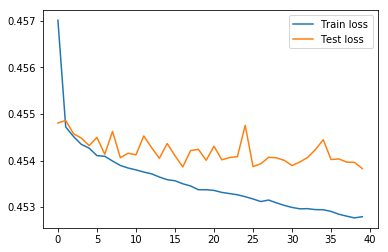

In [29]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();